In [1]:
%matplotlib inline
c = %config InlineBackend.rc
c['savefig.dpi'] = 100
#%config InlineBackend.figure_format='png'
%config InlineBackend.rc = c
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from numpy.fft import fft as np_fft, fftfreq, ifft as np_ifft
i_ = 1j
def fft(x):
    return np_fft(x)/size(x)
def ifft(x):
    return np_ifft(x)*size(x)

In [3]:
L = 2*pi
N = 16
n = arange(N)
xn = L*n/N

k = arange(N)
k[N/2:] -= N

G = 2*pi*k/L

f = pi**2 - (xn-L/2)**2

fG = fft(f)
dfG = i_ * G * fG
ddfG = -G**2 * fG
df = ifft(dfG)
ddf = ifft(ddfG)

In [4]:
L = 2*pi
N = 64
n = arange(N)
xn2 = L*n/N

k = arange(N)
k[N/2:] -= N

G2 = 2*pi*k/L

f2 = pi**2 - (xn2-L/2)**2
df2_analytic = -2*(xn2-L/2)
ddf2_analytic = -2.*ones(N)


fG2_analytic = -pi*k+exp(-2*i_*pi*k)*(-pi*k+i_)-i_
fG2_analytic[0] = 2*pi**2/3
fG2_analytic[1:] /= pi*k[1:]**3

dfG2_analytic = i_ * G2 * fG2_analytic
ddfG2_analytic = -G2**2 * fG2_analytic

fG2 = fft(f2)
dfG2 = i_ * G2 * fG2
ddfG2 = -G2**2 * fG2
df2 = ifft(dfG2)
ddf2 = ifft(ddfG2)

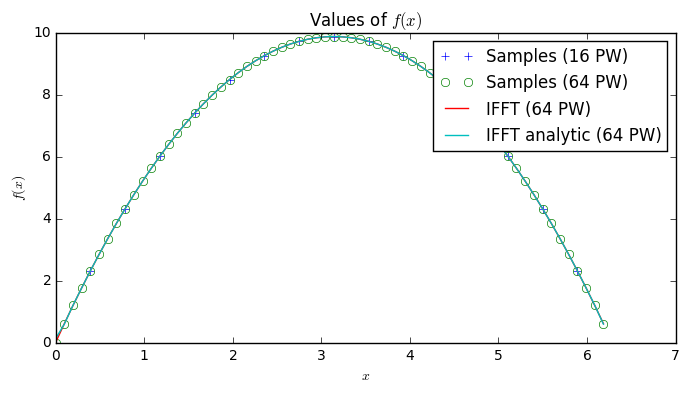

In [5]:
figure(figsize=(8, 4))
plot(xn, f, "+", label="Samples (16 PW)")
plot(xn2, f2, "o", fillstyle='none', label="Samples (64 PW)")
plot(xn2, ifft(fG2).real, label="IFFT (64 PW)")
plot(xn2, ifft(fG2_analytic).real, label="IFFT analytic (64 PW)")
xlabel("$x$")
ylabel("$f(x)$")
title("Values of $f(x)$")
legend()
show()

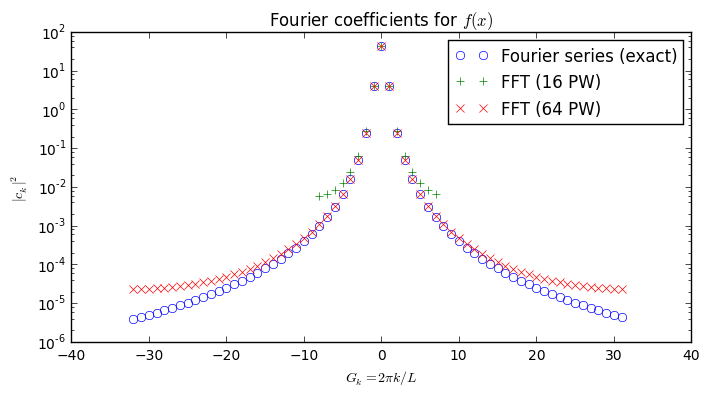

In [6]:
figure(figsize=(8, 4))
semilogy(G2, abs(fG2_analytic)**2, "o", fillstyle='none', label="Fourier series (exact)")
semilogy(G, abs(fG)**2, "+", fillstyle='none', label="FFT (16 PW)")
semilogy(G2, abs(fG2)**2, "x", fillstyle='none', label="FFT (64 PW)")
xlabel("$G_k=2\pi k / L$")
ylabel("$|c_k|^2$")
title("Fourier coefficients for $f(x)$")
legend()
show()

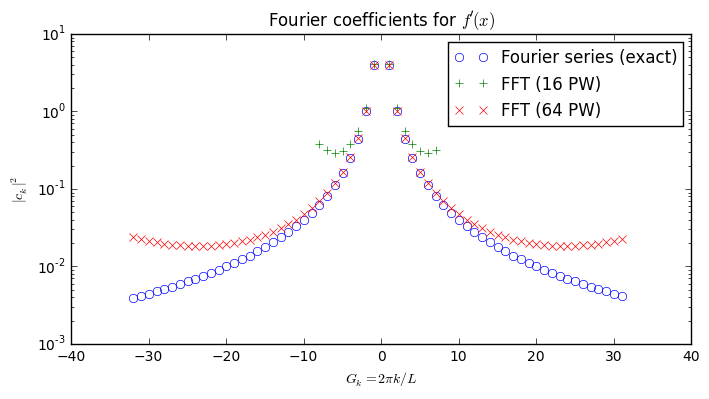

In [7]:
figure(figsize=(8, 4))
semilogy(G2, abs(dfG2_analytic)**2, "o", fillstyle='none', label="Fourier series (exact)")
semilogy(G, abs(dfG)**2, "+", fillstyle='none', label="FFT (16 PW)")
semilogy(G2, abs(dfG2)**2, "x", fillstyle='none', label="FFT (64 PW)")
xlabel("$G_k=2\pi k / L$")
ylabel("$|c_k|^2$")
title("Fourier coefficients for $f'(x)$")
legend()

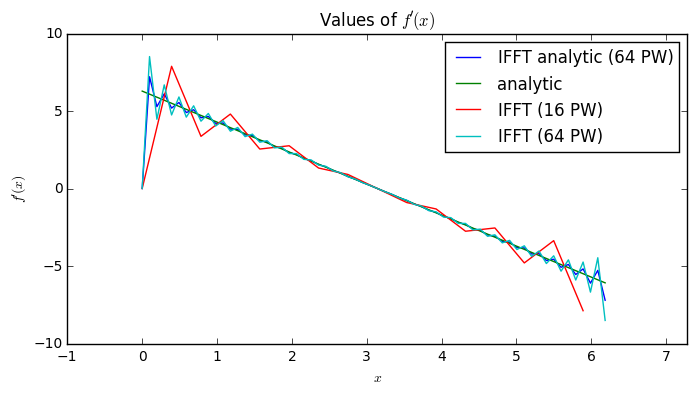

In [8]:
figure(figsize=(8, 4))
plot(xn2, ifft(dfG2_analytic).real, label="IFFT analytic (64 PW)")
plot(xn2, df2_analytic.real, label="analytic")
plot(xn, df.real, label="IFFT (16 PW)")
plot(xn2, df2.real, label="IFFT (64 PW)")
xlim([0-1, L+1])
xlabel("$x$")
ylabel("$f'(x)$")
title("Values of $f'(x)$")
legend()
show()

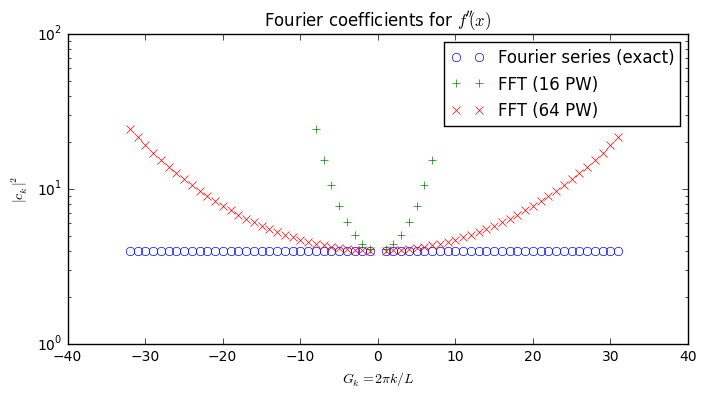

In [9]:
figure(figsize=(8, 4))
semilogy(G2, abs(ddfG2_analytic)**2, "o", fillstyle='none', label="Fourier series (exact)")
semilogy(G, abs(ddfG)**2, "+", fillstyle='none', label="FFT (16 PW)")
semilogy(G2, abs(ddfG2)**2, "x", fillstyle='none', label="FFT (64 PW)")
xlabel("$G_k=2\pi k / L$")
ylabel("$|c_k|^2$")
title("Fourier coefficients for $f''(x)$")
legend()
show()

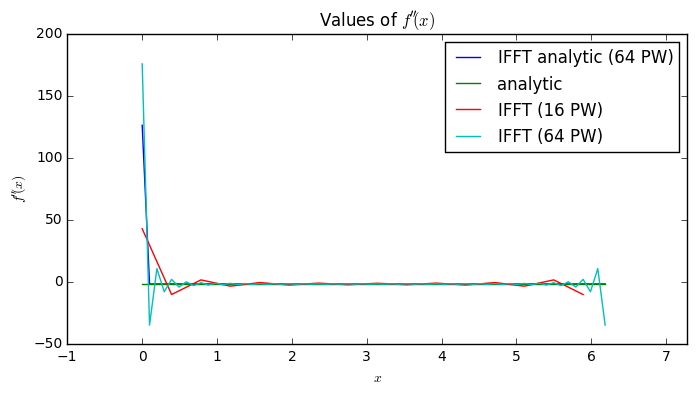

In [10]:
figure(figsize=(8, 4))
plot(xn2, ifft(ddfG2_analytic).real, label="IFFT analytic (64 PW)")
plot(xn2, ddf2_analytic.real, label="analytic")
plot(xn, ddf.real, label="IFFT (16 PW)")
plot(xn2, ddf2.real, label="IFFT (64 PW)")
xlim([0-1, L+1])
xlabel("$x$")
ylabel("$f''(x)$")
title("Values of $f''(x)$")
legend()
show()